## data

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
from zipfile import ZipFile 
# archive = zipfile.ZipFile('images.zip', 'r')
# imgfile = archive.open('img_01.png')
# # specifying the zip file name 
file_name = "drive/My Drive/CA6/OpenNMT-py-master.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
#     zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall("drive/My Drive/CA6/OpenNMT-py") 
#     data = zip.read(name_of_file_to_read)
    print('Done!') 

Extracting all the files now...
Done!


In [8]:
from zipfile import ZipFile 
# archive = zipfile.ZipFile('images.zip', 'r')
# imgfile = archive.open('img_01.png')
# # specifying the zip file name 
file_name = "drive/My Drive/CA6/Corpora.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
#     zip.printdir() 
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall("drive/My Drive/CA6/Corpora") 
#     data = zip.read(name_of_file_to_read)
    print('Done!') 

Extracting all the files now...
Done!


In [10]:
!python "drive/My Drive/CA6/OpenNMT-py/setup.py" install

running install
running bdist_egg
running egg_info
creating OpenNMT_py.egg-info
writing OpenNMT_py.egg-info/PKG-INFO
writing dependency_links to OpenNMT_py.egg-info/dependency_links.txt
writing entry points to OpenNMT_py.egg-info/entry_points.txt
writing requirements to OpenNMT_py.egg-info/requires.txt
writing top-level names to OpenNMT_py.egg-info/top_level.txt
writing manifest file 'OpenNMT_py.egg-info/SOURCES.txt'
reading manifest file 'OpenNMT_py.egg-info/SOURCES.txt'
writing manifest file 'OpenNMT_py.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying OpenNMT_py.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying OpenNMT_py.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying OpenNMT_py.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying

In [3]:
!pip3 install torchtext==0.4.0

     |████████████████████████████████| 61kB 1.8MB/s 
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


## preprocess

In [12]:
!python "drive/My Drive/CA6/OpenNMT-py/preprocess.py" -train_src "drive/My Drive/CA6/OpenNMT-py/data/Corpora/En2Fa-Translation/Train/train.en" -train_tgt "drive/My Drive/CA6/OpenNMT-py/data/Corpora/En2Fa-Translation/Train/train.fa" -valid_src "drive/My Drive/CA6/OpenNMT-py/data/Corpora/En2Fa-Translation/Dev/dev.en" -valid_tgt "drive/My Drive/CA6/OpenNMT-py/data/Corpora/En2Fa-Translation/Dev/dev.fa" -save_data "drive/My Drive/CA6/OpenNMT-py/data/demo"

[2020-05-25 19:31:49,184 INFO] Extracting features...
[2020-05-25 19:31:49,186 INFO]  * number of source features: 0.
[2020-05-25 19:31:49,186 INFO]  * number of target features: 0.
[2020-05-25 19:31:49,186 INFO] Building `Fields` object...
[2020-05-25 19:31:49,186 INFO] Building & saving training data...
[2020-05-25 19:31:49,233 INFO] Building shard 0.
[2020-05-25 19:31:49,999 INFO]  * saving 0th train data shard to drive/My Drive/CA6/OpenNMT-py/data/demo.train.0.pt.
[2020-05-25 19:31:50,708 INFO]  * tgt vocab size: 5908.
[2020-05-25 19:31:50,712 INFO]  * src vocab size: 3116.
[2020-05-25 19:31:50,777 INFO] Building & saving validation data...
[2020-05-25 19:31:50,807 INFO] Building shard 0.
[2020-05-25 19:31:50,811 INFO]  * saving 0th valid data shard to drive/My Drive/CA6/OpenNMT-py/data/demo.valid.0.pt.


## train

In [14]:
!python "drive/My Drive/CA6/OpenNMT-py/train.py" -data "drive/My Drive/CA6/OpenNMT-py/data/demo" -save_model "drive/My Drive/CA6/OpenNMT-py/demo-model" -train_steps 50000 -world_size 1 -gpu_ranks 0

[2020-05-25 19:37:26,362 INFO]  * src vocab size = 3116
[2020-05-25 19:37:26,362 INFO]  * tgt vocab size = 5908
[2020-05-25 19:37:26,362 INFO] Building model...
[2020-05-25 19:37:35,955 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(3116, 500, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(500, 500, num_layers=2, dropout=0.3)
  )
  (decoder): InputFeedRNNDecoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(5908, 500, padding_idx=1)
        )
      )
    )
    (dropout): Dropout(p=0.3, inplace=False)
    (rnn): StackedLSTM(
      (dropout): Dropout(p=0.3, inplace=False)
      (layers): ModuleList(
        (0): LSTMCell(1000, 500)
        (1): LSTMCell(500, 500)
      )
    )
    (attn): GlobalAttention(
      (linear_in): Linear(in_features=500, out_features=500, bias=False)
      (li

## translate

In [16]:
!python "drive/My Drive/CA6/OpenNMT-py/translate.py" -model "drive/My Drive/CA6/OpenNMT-py/demo-model_step_50000.pt" -src "drive/My Drive/CA6/OpenNMT-py/data/Corpora/En2Fa-Translation/Test/test.en" -output "drive/My Drive/CA6/OpenNMT-py/data/pred.txt" -replace_unk -verbose

[2020-05-25 20:26:05,500 INFO] Translating shard 0.
/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.

SENT 1: ['hello', ',', 'do', 'we', 'drive', 'together', 'to', 'Hanover', 'on', 'the', 'twenty-eighth', 'of', 'March', '?']
PRED 1: سلام , آیا ما رانندگی باید با Hanover در twenty-eighth مارس ؟
PRED SCORE: -2.1547

SENT 2: ['it', 'is', 'more', 'comfortable', 'by', 'train', '.']
PRED 2: این بیشتر با قطار بیشتری است .
PRED SCORE: -2.4367

SENT 3: ['do', 'you', 'go', 'by', 'car', 'and', 'I', 'go', 'by', 'train', '?']
PRED 3: آیا شما با قطار و من با قطار ؟
PRED SCORE: -2.3428

SENT 4: ['I', 'would', 'like', 'to', 'go', 'by', 'train', '.', 'and', 'what', 'would', 'you', 'like', '?']
PRED 4: من میخواهم با قطار . و چه چیزی مد نظر شماست ؟
PRED SCORE: -1.0691

SENT 5: ['if', 'we', 'take', 'the', '$I-$C

## BLEU SCORE

In [8]:
!perl "drive/My Drive/CA6/OpenNMT-py/tools/multi-bleu.perl" "drive/My Drive/CA6/OpenNMT-py/data/Corpora/En2Fa-Translation/Test/test.fa0" < "drive/My Drive/CA6/OpenNMT-py/data/pred.txt"

BLEU = 18.30, 58.0/26.5/13.3/6.9 (BP=0.945, ratio=0.947, hyp_len=2548, ref_len=2692)


In [9]:
!perl "drive/My Drive/CA6/OpenNMT-py/tools/multi-bleu.perl" "drive/My Drive/CA6/OpenNMT-py/data/Corpora/En2Fa-Translation/Test/test.fa1" < "drive/My Drive/CA6/OpenNMT-py/data/pred.txt"

BLEU = 18.87, 58.4/27.0/14.0/7.4 (BP=0.937, ratio=0.939, hyp_len=2548, ref_len=2713)


In [10]:
!perl "drive/My Drive/CA6/OpenNMT-py/tools/multi-bleu.perl" "drive/My Drive/CA6/OpenNMT-py/data/Corpora/En2Fa-Translation/Test/test.fa2" < "drive/My Drive/CA6/OpenNMT-py/data/pred.txt"

BLEU = 12.77, 50.8/19.8/8.9/3.8 (BP=0.942, ratio=0.944, hyp_len=2548, ref_len=2700)


In [0]:
x = !perl "drive/My Drive/CA6/OpenNMT-py/tools/multi-bleu.perl" "drive/My Drive/CA6/OpenNMT-py/data/Corpora/En2Fa-Translation/Test/test.fa3" < "drive/My Drive/CA6/OpenNMT-py/data/pred.txt"

## Converge With BLEU 

In [59]:
!pip install ConfigArgParse
import configargparse
bleu_score = []
x = []
for i in range(10):
  x.append((i+1)*5000)
  path = "drive/My Drive/CA6/OpenNMT-py/demo-model_step_"+str((i+1)*5000)+".pt"
  print(path)
  !python "drive/My Drive/CA6/OpenNMT-py/translate.py" -model "$path" -src "drive/My Drive/CA6/OpenNMT-py/data/Corpora/En2Fa-Translation/Dev/dev.en" -output "drive/My Drive/CA6/OpenNMT-py/data/pred.txt" -replace_unk
  x = !perl "drive/My Drive/CA6/OpenNMT-py/tools/multi-bleu.perl" "drive/My Drive/CA6/OpenNMT-py/data/Corpora/En2Fa-Translation/Dev/dev.fa" < "drive/My Drive/CA6/OpenNMT-py/data/pred.txt"
  print(x)
  bleu_score.append(float(x[0][x[0].find('=')+2:x[0].find(',')]))

drive/My Drive/CA6/OpenNMT-py/demo-model_step_5000.pt
[2020-05-25 22:39:56,512 INFO] Translating shard 0.
/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.
PRED AVG SCORE: -0.5547, PRED PPL: 1.7415
['BLEU = 15.91, 57.9/25.0/11.5/5.7 (BP=0.906, ratio=0.910, hyp_len=3039, ref_len=3339)']
drive/My Drive/CA6/OpenNMT-py/demo-model_step_10000.pt
[2020-05-25 22:40:10,575 INFO] Translating shard 0.
/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.
PRED AVG SCORE: -0.4002, PRED PPL: 1.4921
['BLEU = 15.59, 59.8/26.2/12.3/5.9 (BP=0.849, ratio=0.860, hyp_len=2870, ref_len=3339)']
drive/My Drive/CA6/OpenNMT-py/dem

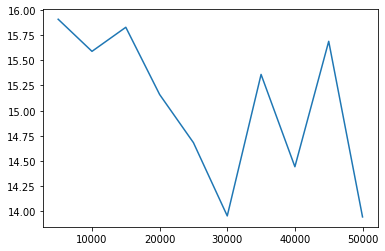

In [61]:
x = [5000,10000,15000,20000,25000,30000,35000,40000,45000,50000]
import matplotlib.pyplot as plt
plt.plot(x,bleu_score) # plotting by columns
plt.show()